In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

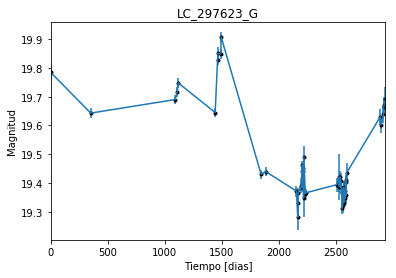

In [2]:
data = np.genfromtxt('LC_297623_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_297623_G')
plt.savefig("LC_297623_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

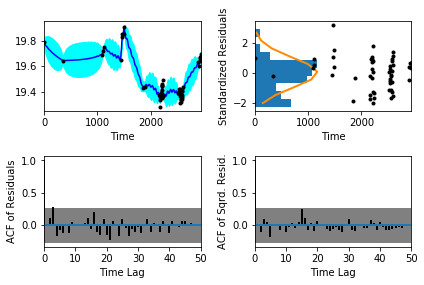

In [5]:
sample.assess_fit()

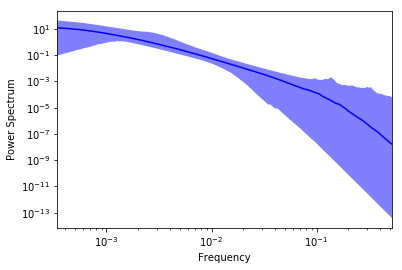

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

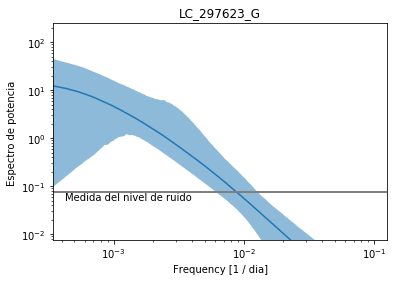

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_297623_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_297623_G')

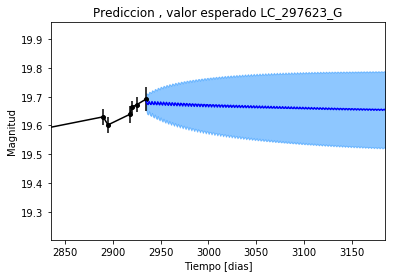

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_297623_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_297623_G')

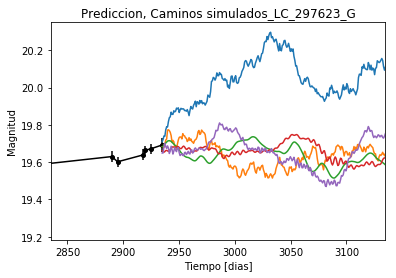

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_297623_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


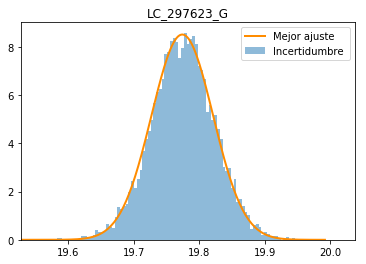

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_297623_G')
plt.savefig("Mejor_ajuste_LC_297623_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_297623_G')

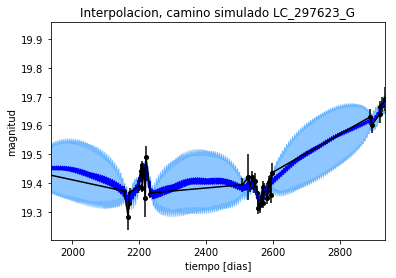

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_G')

Text(0.5,1,'Interpolacion, camino simulado LC_297623_G')

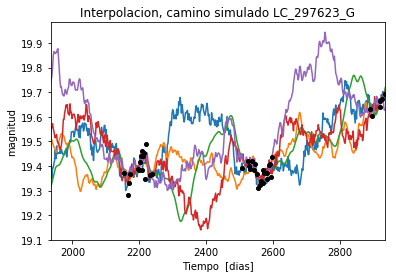

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 391.681831753
Median: 0.038486505235
Standard deviation: 0.227097613908
68% credibility interval: [ 0.0032142   0.33624065]
95% credibility interval: [  5.72468391e-04   8.42021817e-01]
99% credibility interval: [  3.68578891e-04   9.92433512e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 121.57590046
Median: 0.0133549553611
Standard deviation: 0.169064773444
68% credibility interval: [ 0.00100215  0.12644792]
95% credibility interval: [  3.94206656e-04   6.88242377e-01]
99% credibility interval: [  3.50874239e-04   9.31124313e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 301.565268937
Median: 0.0909084070413
Sta

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 691.135142971
Median: 101.75023925
Standard deviation: 2.06525413472
68% credibility interval: [  99.56577264  103.51505061]
95% credibility interval: [  96.7160168   104.79522985]
99% credibility interval: [  94.45852805  105.55567625]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 343.911683397
Median: 1.94763077341
Standard deviation: 2.84994690983
68% credibility interval: [ 0.24727095  5.84906192]
95% credibility interval: [  0.05510261  10.02313741]
99% credibility interval: [  0.0240297   12.69208112]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 549.397322155
Median: 2.75764053145
Standard deviation: 14.2235783616
68% credibility interval: [  0.28712405  20.45420453]
95% credibility interval: [  1.3131547

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19973.5753909
Median: 3.68601160615e-23
Standard deviation: 1.36639228519e+118
68% credibility interval: [  1.89015291e-72   5.34831498e+00]
95% credibility interval: [  4.61782597e-104   1.43011335e+088]
99% credibility interval: [  3.43556737e-118   1.92063018e+115]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2033.45512283
Median: 19.6026025653
Standard deviation: 0.0857682890839
68% credibility interval: [ 19.52883688  19.68020679]
95% credibility interval: [ 19.44135766  19.78336039]
99% credibility interval: [ 19.36460069  19.87801929]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 419.993946903
Median: 0.138175259126
Standard deviation: 0.283690413127
68% credibility interval: [ 0.         0.5677941]
95% credibility interval: [ 0.          0.98825283]
99% credibility interval: [ 0.          1.02677386]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 419.993946903
Median: 0.138175259126
Standard deviation: 0.283690413127
68% credibility interval: [ 0.         0.5677941]
95% credibility interval: [ 0.          0.98825283]
99% credibility interval: [ 0.          1.02677386]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 3059.36796177
Median: 0.0
Standard deviation: 0.00583317364331
68% credibili

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 691.135142971
Median: 101.75023925
Standard deviation: 2.06525413472
68% credibility interval: [  99.56577264  103.51505061]
95% credibility interval: [  96.7160168   104.79522985]
99% credibility interval: [  94.45852805  105.55567625]


In [26]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 780.352974597
Median: 0.0336482772828
Standard deviation: 0.0261218911207
68% credibility interval: [ 0.02195686  0.05414886]
95% credibility interval: [ 0.01440008  0.10466961]
99% credibility interval: [ 0.01269528  0.16336147]


In [27]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1381.15571184
Median: 1.17830602048
Standard deviation: 0.240485970963
68% credibility interval: [ 0.94677799  1.43414682]
95% credibility interval: [ 0.78678476  1.71635399]
99% credibility interval: [ 0.69477645  1.88929599]


In [28]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 254.830453377
Median: 0.00504694095123
Standard deviation: 0.433145675127
68% credibility interval: [  2.81389990e-05   1.72163379e-01]
95% credibility interval: [  1.66530807e-91   1.44186202e+00]
99% credibility interval: [  2.93524148e-118   3.02869647e+000]


In [29]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 391.681831753
Median: (-0.241817844217+0j)
Standard deviation: 2.28325781479
68% credibility interval: [-2.11266234-2.97378294j -0.02019541-0.34146933j]
95% credibility interval: [ -5.29057911e+00-4.90908272j  -3.59692498e-03-0.60574149j]
99% credibility interval: [ -6.23564366e+00-0.02748282j  -2.31584947e-03-0.86014696j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 121.57590046
Median: (-0.0839116593032+1.05827725277j)
Standard deviation: 2.07500373655
68% credibility interval: [-0.79449574+5.33063106j -0.00629671+0.44213453j]
95% credibility interval: [ -4.32435439e+00+4.12415579j  -2.47687347e-03+0.66441016j]
99% credibility interval: [ -5.85042660e+00+4.56298299j  -2.20460786e-03+2.09286202j]
Posterior summary 